# Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Data Colection

In [2]:
# Loading data
reliance_data = pd.read_csv("reliance_data.csv")

In [3]:
reliance_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2014,444.511475,444.907715,439.632721,440.227081,414.639191,2699496.0
1,02-01-2014,439.682251,443.793274,430.964874,433.391876,408.201294,2779905.0
2,03-01-2014,431.707855,432.574615,423.485779,428.067352,403.186218,5922841.0
3,06-01-2014,427.002441,427.572052,421.009247,423.460999,398.847626,6145266.0
4,07-01-2014,423.287659,425.937531,416.080963,417.096344,392.852966,7989240.0
...,...,...,...,...,...,...,...
2217,26-12-2022,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
2218,27-12-2022,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
2219,28-12-2022,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
2220,29-12-2022,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0


In [4]:
# Loading data
nifty_data = pd.read_csv("nifty_50_data.csv")

In [5]:
nifty_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2014,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-2014,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100.0
2,03-01-2014,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000.0
3,06-01-2014,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300.0
4,07-01-2014,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600.0
...,...,...,...,...,...,...,...
2217,26-12-2022,17830.400390,18084.099610,17774.250000,18014.599610,18014.599610,176700.0
2218,27-12-2022,18089.800780,18149.250000,17967.449220,18132.300780,18132.300780,214300.0
2219,28-12-2022,18084.750000,18173.099610,18068.349610,18122.500000,18122.500000,193900.0
2220,29-12-2022,18045.699220,18229.699220,17992.800780,18191.000000,18191.000000,281100.0


# Data Preparation

In [6]:
# Dealing with NAN values
reliance_data[reliance_data.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
56,22-03-2014,NaN,NaN,NaN,NaN,NaN,NaN
285,28-02-2015,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
reliance_data.dropna(inplace=True)

In [8]:
reliance_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
reliance_data.duplicated().sum()

0

In [10]:
#Dealing with NAN values
nifty_data.isna().sum()

Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [11]:
nifty_data[nifty_data.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2014,NaN,NaN,NaN,NaN,NaN,NaN
33,17-02-2014,NaN,NaN,NaN,NaN,NaN,NaN
56,22-03-2014,NaN,NaN,NaN,NaN,NaN,NaN
77,24-04-2014,NaN,NaN,NaN,NaN,NaN,NaN
194,15-10-2014,NaN,NaN,NaN,NaN,NaN,NaN
245,01-01-2015,NaN,NaN,NaN,NaN,NaN,NaN
285,28-02-2015,NaN,NaN,NaN,NaN,NaN,NaN
314,15-04-2015,NaN,NaN,NaN,NaN,NaN,NaN
492,01-01-2016,NaN,NaN,NaN,NaN,NaN,NaN
644,12-08-2016,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
nifty_data.dropna(inplace=True)

In [13]:
nifty_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
nifty_data.duplicated().sum()

0

In [15]:
reliance_data.columns

Index(['Date', 'Open ', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
reliance_data.drop(columns = ['Open ', 'High', 'Low', 'Adj Close'], inplace=True)

In [17]:
nifty_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
# Renaming columns
nifty_data.drop(columns = ['Open', 'High', 'Low', 'Adj Close'], inplace=True)

In [19]:
reliance_data.head()

,Date,Close,Volume
0,01-01-2014,440.227081,2699496.0
1,02-01-2014,433.391876,2779905.0
2,03-01-2014,428.067352,5922841.0
3,06-01-2014,423.460999,6145266.0
4,07-01-2014,417.096344,7989240.0


In [20]:
nifty_data.head()

,Date,Close,Volume
1,02-01-2014,6221.149902,158100.0
2,03-01-2014,6211.149902,139000.0
3,06-01-2014,6191.450195,118300.0
4,07-01-2014,6162.250000,138600.0
5,08-01-2014,6174.600098,146900.0


In [21]:
reliance_data.shape

(2220, 3)

In [22]:
nifty_data.shape

(2208, 3)

In [23]:
#Joining two dataframe to create one final dataframe
df = reliance_data.merge(nifty_data, on='Date', how='inner')

In [24]:
df.shape

(2208, 5)

In [25]:
df.head()

,Date,Close_x,Volume_x,Close_y,Volume_y
0,02-01-2014,433.391876,2779905.0,6221.149902,158100.0
1,03-01-2014,428.067352,5922841.0,6211.149902,139000.0
2,06-01-2014,423.460999,6145266.0,6191.450195,118300.0
3,07-01-2014,417.096344,7989240.0,6162.250000,138600.0
4,08-01-2014,420.538727,5873245.0,6174.600098,146900.0


In [26]:
df.columns

Index(['Date', 'Close_x', 'Volume_x', 'Close_y', 'Volume_y'], dtype='object')

In [27]:
df.columns = ['date', 'stock_price', 'stock_vol', 'index_point', 'index_volume']

In [28]:
df.head()

,date,stock_price,stock_vol,index_point,index_volume
0,02-01-2014,433.391876,2779905.0,6221.149902,158100.0
1,03-01-2014,428.067352,5922841.0,6211.149902,139000.0
2,06-01-2014,423.460999,6145266.0,6191.450195,118300.0
3,07-01-2014,417.096344,7989240.0,6162.250000,138600.0
4,08-01-2014,420.538727,5873245.0,6174.600098,146900.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2208 non-null   object 
 1   stock_price   2208 non-null   float64
 2   stock_vol     2208 non-null   float64
 3   index_point   2208 non-null   float64
 4   index_volume  2208 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.4+ KB


In [30]:
# Converting float column values to integer
df.stock_price = df.stock_price.astype(int)
df.stock_vol = df.stock_vol.astype(int)
df.index_point = df.index_point.astype(int)
df.index_volume = df.index_volume.astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2208 non-null   object
 1   stock_price   2208 non-null   int32 
 2   stock_vol     2208 non-null   int32 
 3   index_point   2208 non-null   int32 
 4   index_volume  2208 non-null   int32 
dtypes: int32(4), object(1)
memory usage: 51.9+ KB


In [32]:
df.head()

,date,stock_price,stock_vol,index_point,index_volume
0,02-01-2014,433,2779905,6221,158100
1,03-01-2014,428,5922841,6211,139000
2,06-01-2014,423,6145266,6191,118300
3,07-01-2014,417,7989240,6162,138600
4,08-01-2014,420,5873245,6174,146900


In [33]:
df.tail()

,date,stock_price,stock_vol,index_point,index_volume
2203,26-12-2022,2524,2764496,18014,176700
2204,27-12-2022,2544,2659749,18132,214300
2205,28-12-2022,2544,3442509,18122,193900
2206,29-12-2022,2543,3198493,18191,281100
2207,30-12-2022,2547,3364092,18105,192000


In [34]:
# Converting date column from string data type to datetime object
df.date = pd.to_datetime(df.date, format='%d-%m-%Y')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2208 non-null   datetime64[ns]
 1   stock_price   2208 non-null   int32         
 2   stock_vol     2208 non-null   int32         
 3   index_point   2208 non-null   int32         
 4   index_volume  2208 non-null   int32         
dtypes: datetime64[ns](1), int32(4)
memory usage: 51.9 KB


In [36]:
df.index_volume.sort_values()

1103          0
1776          0
798           0
1757          0
1640          0
         ...   
1512    1388000
1420    1414800
1515    1516600
1509    1565500
1508    1811000
Name: index_volume, Length: 2208, dtype: int32

In [37]:
# Removing absurd values
temp_df = df[(df.index_volume==0) | (df.index_volume==100) | (df.index_volume==400) | (df.index_volume==500)]
rows_to_drop = temp_df.index
temp_df.head()

,date,stock_price,stock_vol,index_point,index_volume
798,2017-04-17,689,5463005,9139,0
1054,2018-04-27,986,11776851,10692,0
1069,2018-05-21,922,6687690,10516,0
1103,2018-07-06,968,9248105,10772,0
1108,2018-07-13,1089,18137593,11018,0


In [38]:
df.drop(index=rows_to_drop, inplace=True)

In [39]:
df.index_volume.sort_values()

926       30200
1185      31200
856       37500
2160      45000
1920      48500
         ...   
1512    1388000
1420    1414800
1515    1516600
1509    1565500
1508    1811000
Name: index_volume, Length: 2183, dtype: int32

# Data Exploration

In [40]:
df.describe()

,date,stock_price,stock_vol,index_point,index_volume
count,2183,2183.000000,2.183000e+03,2183.000000,2.183000e+03
mean,2018-07-05 14:49:51.479615232,1221.597343,8.852340e+06,11115.771415,3.154242e+05
min,2014-01-02 00:00:00,396.000000,7.871600e+05,6000.000000,3.020000e+04
25%,2016-04-04 12:00:00,501.000000,5.187918e+06,8380.500000,1.728000e+05
50%,2018-06-25 00:00:00,977.000000,7.008431e+06,10454.000000,2.419000e+05
75%,2020-10-08 12:00:00,1964.000000,9.979999e+06,12181.000000,3.913500e+05
max,2022-12-30 00:00:00,2819.000000,6.584835e+07,18812.000000,1.811000e+06
std,NaN,758.785120,6.472793e+06,3373.465001,2.057935e+05


In [80]:
df.stock_price.median(), df.index_point.median()

(977.0, 10454.0)

In [82]:
print("Mean of reliance stock price: ₹1,221")
print("Median of reliance stock price: ₹977")
print("Standary deviation of reliance stock price: ₹759")
print("")
print("Mean reliance stock price: 11,115")
print("Standary deviation of reliance stock price: 10454")
print("Standary deviation of nifty 50 index point: 3373")

Mean of reliance stock price: ₹1,221
Median of reliance stock price: ₹977
Standary deviation of reliance stock price: ₹759

Mean reliance stock price: 11,115
Standary deviation of reliance stock price: 10454
Standary deviation of nifty 50 index point: 759


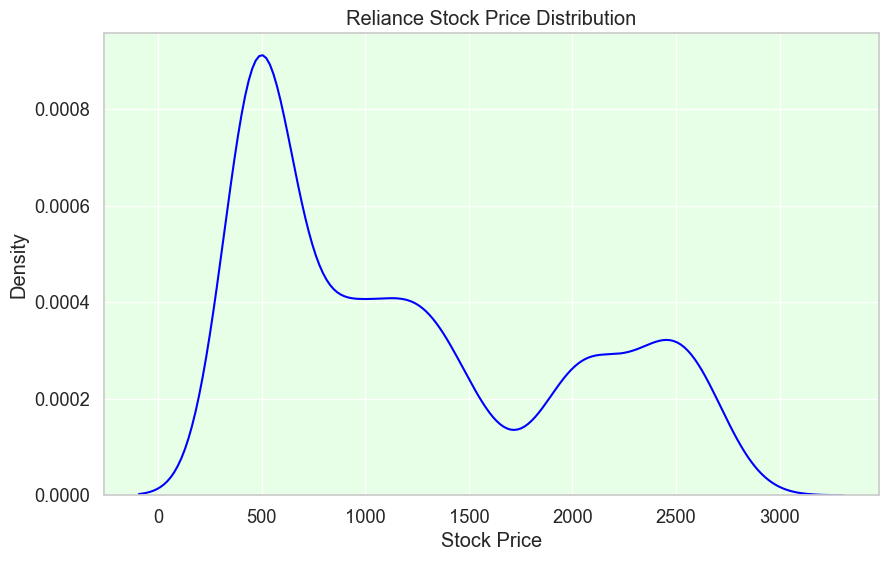

In [171]:
#Plotting density graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
plt.gca().set_facecolor('#e6ffe6')
sns.kdeplot(data=df['stock_price'], color='blue')
plt.title('Reliance Stock Price Distribution')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.show()

In [167]:
# Calculating the skewness
stock_skewness = round(skew(df['stock_price']), 2)
print("Skewness of the stock_price:", stock_skewness)

Skewness of the stock_price: 0.6


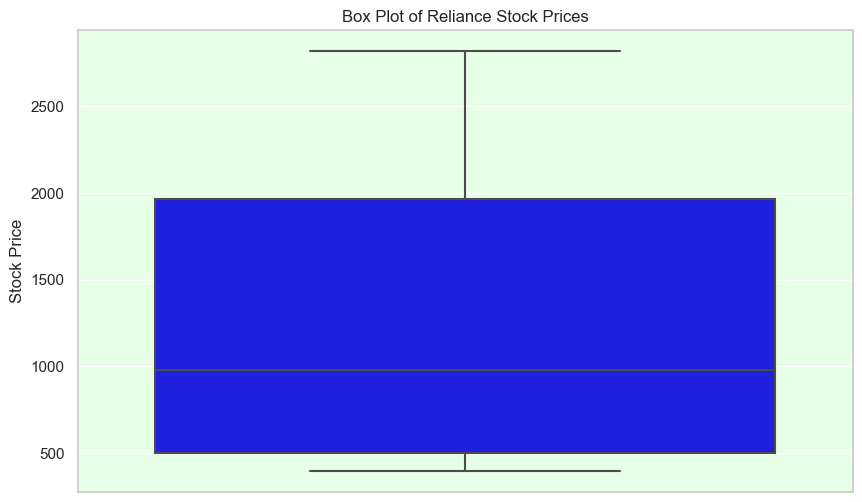

In [124]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
plt.gca().set_facecolor('#e6ffe6')

sns.boxplot(y=df['stock_price'], color='blue')
plt.title('Box Plot of Reliance Stock Prices')
plt.ylabel('Stock Price')
plt.xlabel('')
plt.show()

The stock price column is moderately positively skewed therefor, it indicates that there are more instances of lower stock prices compared to higher ones.

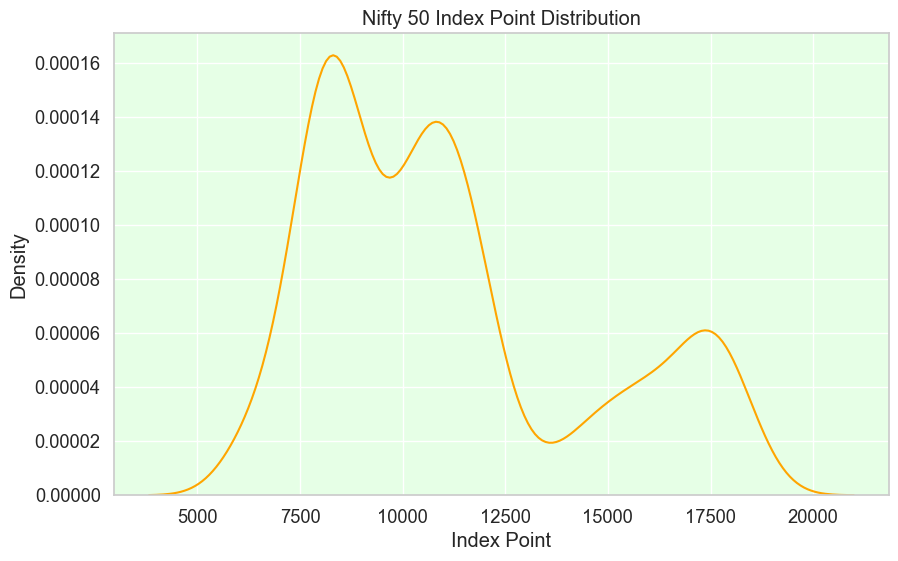

In [173]:
#Plotting density graph
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.kdeplot(data=df['index_point'], color='orange')
plt.title('Nifty 50 Index Point Distribution')
plt.xlabel('Index Point')
plt.ylabel('Density')
plt.gca().set_facecolor('#e6ffe6')

In [169]:
# Calculating the skewness
index_skewness = round(skew(df['index_point']), 2)
print("Skewness of the index_point:", index_skewness)

Skewness of the index_point: 0.79


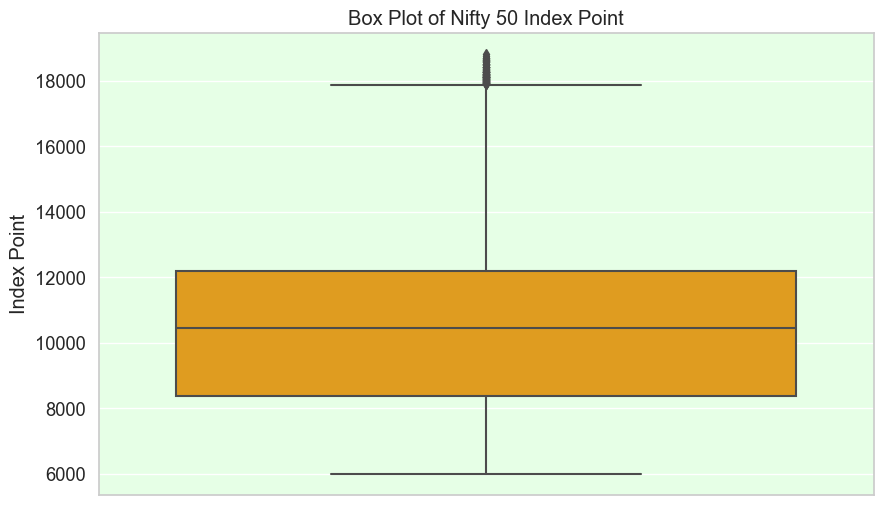

In [160]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
plt.gca().set_facecolor('#e6ffe6')

sns.boxplot(y=df['index_point'], color='orange')
plt.title('Box Plot of Nifty 50 Index Point')
plt.ylabel('Index Point')
plt.xlabel('')
plt.show()

The stock price column is moderately positively skewed therefor, it indicates that there are more instances of lower index points as compared to higher ones.

# Correlation Analysis

In [43]:
# Creating correlation matrix
correlation_matrix = df[['stock_price', 'stock_vol', 'index_point', 'index_volume']]
correlation_matrix = correlation_matrix.corr()
correlation_matrix

,stock_price,stock_vol,index_point,index_volume
stock_price,1.000000,0.109424,0.946559,0.432842
stock_vol,0.109424,1.000000,-0.052980,0.503068
index_point,0.946559,-0.052980,1.000000,0.270758
index_volume,0.432842,0.503068,0.270758,1.000000


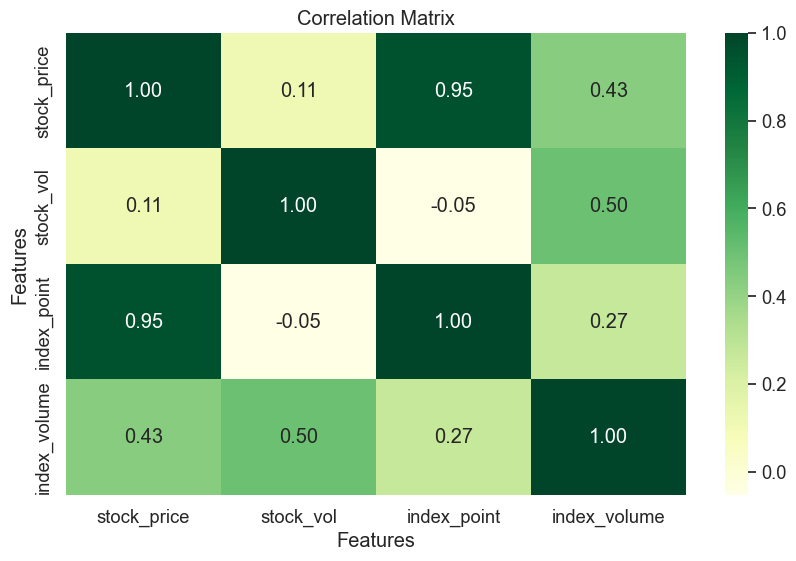

In [131]:
# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

There's strong positive correlation (0.94) between stock price and index point, also weak positive correlation (0.5) exist between stock volumen and index volume.

# Comparative Analysis

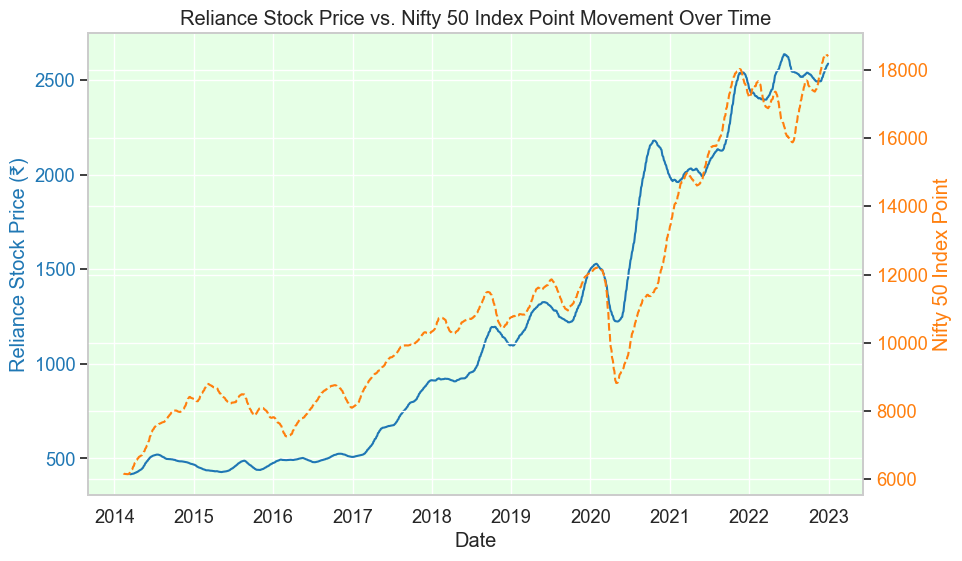

In [174]:
#Creating moving average to smoothen the graphs
window_size = 50
df['stock_price_smooth'] = df['stock_price'].rolling(window=window_size).mean()
df['stock_volume_smooth'] = df['stock_vol'].rolling(window=window_size).mean()

# Creating a line plot using with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('#e6ffe6')
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Reliance Stock Price (₹)', color=color)
ax1.plot(df['date'], df['stock_price_smooth'], color=color, label='Reliance Stock Price', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Nifty 50 Index Point', color=color)
ax2.plot(df['date'], df['index_point_smooth'], color=color, label='Nifty 50 Index Point', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Reliance Stock Price vs. Nifty 50 Index Point Movement Over Time')
plt.grid(True, color='white')

plt.show()


1) Most of the time stock price and index point follows same trend with few exceptions.
2) Before 2020, we can see one inteval (Mar 2015) where the stock price underperformed the index point.
3) After 2020, we can see two intevals (Oct 2020, May 2022) where stock price outperformed the index point.

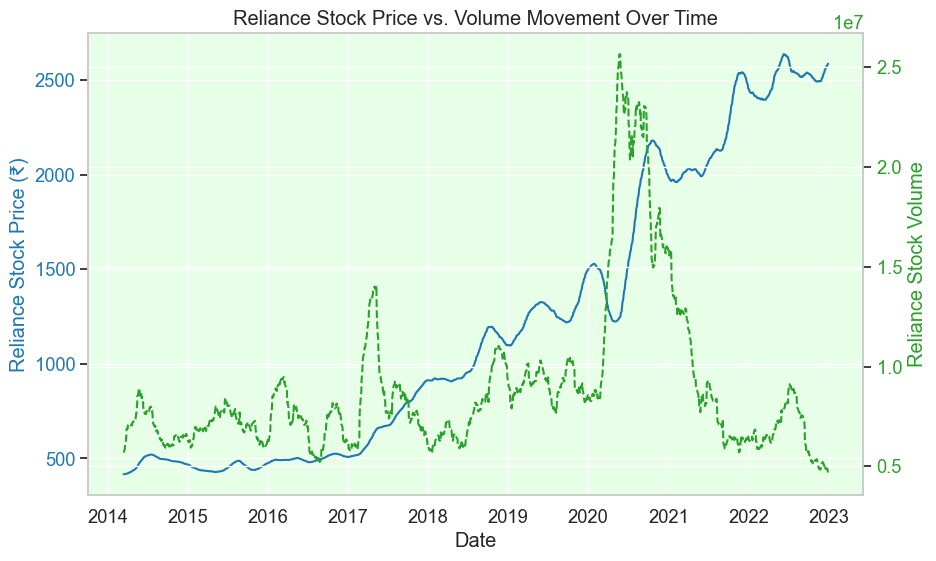

In [178]:
# Creating a linw plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('#e6ffe6')
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Reliance Stock Price (₹)', color=color)
ax1.plot(df['date'], df['stock_price_smooth'], color=color, label='Reliance Stock Price', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Reliance Stock Volume', color=color)
ax2.plot(df['date'], df['stock_volume_smooth'], color=color, label='Reliance Stock Volume', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Reliance Stock Price vs. Volume Movement Over Time')
plt.grid(True, color='white')

plt.show()


After Sept 2020, The stock price is steadily increasing but there's steep downfall in stock volume.

In [48]:
# Calculating growth % if stock price and index point
stock_growth = round(((df.stock_price[2207] - df.stock_price[0])/df.stock_price[0])*100)
index_growth = round(((df.index_point[2207] - df.index_point[0])/df.index_point[0])*100)

print("Reliance Stock Price Growth:", stock_growth, "%")
print(f"Nifty 50 Index Growth:", index_growth, "%")

Reliance Stock Price Growth: 488 %
Nifty 50 Index Growth: 191 %


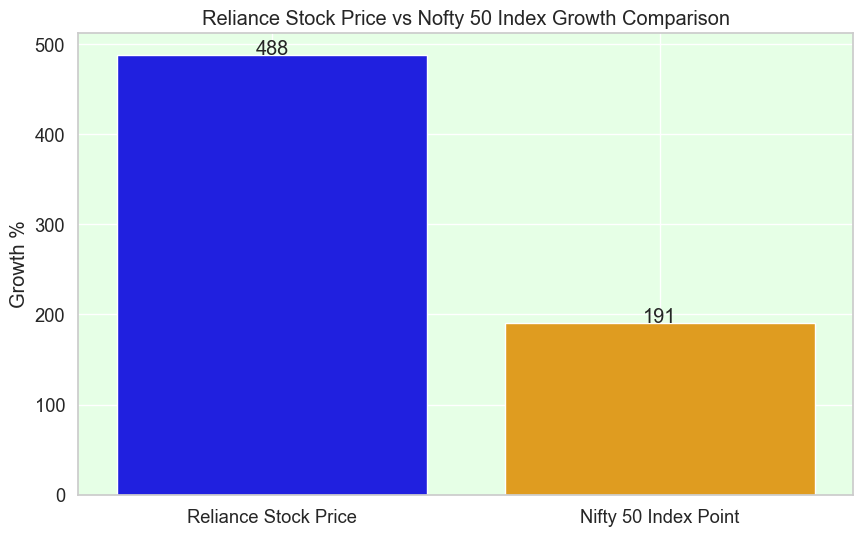

In [157]:
asset = ['Reliance Stock Price', 'Nifty 50 Index Point']
growth = [stock_growth, index_growth]

# Creating bar plot
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#e6ffe6')

sns.barplot(x=asset, y=growth, palette=['blue', 'orange'])
plt.title('Reliance Stock Price vs Nofty 50 Index Growth Comparison')
plt.ylabel('Growth %')
plt.xlabel('')
plt.grid(True, color='white')

# Adding data labels inside the bars
for index, value in enumerate(growth):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.show()


The growth percentage of reliance stock is considerably high as compared to nifty 50 index.

# Alpha Beta Analysis

In [68]:
# Calculating daily returns
df['stock_return'] = df['stock_price'].pct_change()
df['index_return'] = df['index_point'].pct_change()

# Calculating covariance between stock returns and market returns
covariance = np.cov(df['Stock Returns'].dropna(), df['Market Returns'].dropna())[0][1]

# Calculate variance of market returns
variance_market = np.var(df['Market Returns'].dropna())

# Calculate beta
beta = round(covariance / variance_market, 2)

print("Volatility Indicator (Beta)", beta)
print("Reliance stock in question tends to be slightly more volatile than the overall market.")

Volatility Indicator (Beta) 1.09
Reliance stock in question tends to be slightly more volatile than the overall market.


In [67]:
# Calculating alpha
risk_free_rate = 7.16 
market_return = df['index_return'].mean() 
beta = 1.09  

df['Alpha'] = df['stock_return'] - (risk_free_rate + beta * (market_return - risk_free_rate))

alpha = round(df['Alpha'].mean(), 2)

print("Return Indicator (Alpha):", alpha)
print("Reliance stock has performed better than what would be expected based on the overall market trends.")

Return Indicator (Alpha): 0.64
Reliance stock has performed better than what would be expected based on the overall market trends.


# Summary

1. **Descriptive Statistics:**
   - Mean of Reliance Stock Price: ₹1,221
   - Median of Reliance Stock Price: ₹977
   - Standard Deviation of Reliance Stock Price: ₹759
   - Mean of Nifty 50 Index Point: 11,115
   - Median of Nifty 50 Index Point: 10454
   - Standard Deviation of Nifty 50 Index Point: 3373
   
   <br>

2. **Stock Price Distribution:**
   - The stock price column is moderately positively skewed therefore, it indicates that there are more instances of lower stock price as compared to higher ones.
   
   <br>

3. **Index Point Distribution:**
   - The index point column is moderately positively skewed therefore, it indicates that there are more instances of lower index points as compared to higher ones.
   
   <br>

4. **Correlation Analysis:**
   - There's a strong positive correlation (0.94) between the stock price and the index point.
   - Additionally, a weak positive correlation (0.5) exists between stock volume and index volume.
   - Most of the time, the stock price and index point follow the same trend, although there are a few exceptions.
   
   <br>

5. **Trend Observation:**
   - Post-September 2020, the stock price has been steadily increasing, but there's a notable steep downfall in stock volume.
   
   <br>

6. **Growth Analysis:**
   - Reliance Stock Price Growth: 488%
   - Nifty 50 Index Growth: 191%
   - The growth percentage of Reliance stock is considerably higher than that of the Nifty 50 index.
   
   <br>

7. **Volatility Indicator (Beta):**
   - Volatility Indicator (Beta): 1.09
   - The Reliance stock tends to be slightly more volatile than the overall market.
   
   <br>

8. **Return Indicator (Alpha):**
   - Return Indicator (Alpha): 0.64
   - Reliance stock has performed better than expected based on the overall market trends.